In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('https://query.data.world/s/hito3b72znnljalyizwbuv2fh34oe6', dtype=str)




# Data Cleansing


In [2]:
#Look for Null values and Drop columns that will not be used in analysis
df.isna().sum()


Hospital Service Area                     5155
Hospital County                           5155
Operating Certificate Number              5155
Permanent Facility Id                     5155
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      39019
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

In [2]:
#Drop the following columns:
df = df.drop(columns=['Operating Certificate Number', 'Permanent Facility Id', 'Zip Code - 3 digits','Ethnicity', 'Discharge Year', 'Birth Weight', 'CCS Diagnosis Code', 'CCS Procedure Code','APR DRG Code','APR MDC Code','Payment Typology 3','Abortion Edit Indicator'])


In [3]:
#Rename Columns to eliminate spaces
df = df.rename(columns = {'Hospital Service Area': 'Service_Area','Hospital County':'County', 'Facility Name':'Hos_Name', 'Age Group':'Age', 'Length of Stay':'Length_Stay', 'Type of Admission': 'Admis_Type', 'Patient Disposition':'Disposition', 'CCS Diagnosis Description':'Diagnosis_Descrip', 'CCS Procedure Description':'Procedure_Descrip', 'APR DRG Description':'ARP_DRG_Descrip', 'APR MDC Description':'APR_MDC_Descrip', 'APR Severity of Illness Code':'Severity_Code','APR Severity of Illness Description':'Severity_Descrip', 'APR Risk of Mortality':'Mortality_Risk', 'APR Medical Surgical Description':'Surgical_Descrip', 'Payment Typology 1':'Payment_Typology_1', 'Payment Typology 2':'Payment_Typology_2', 'Emergency Department Indicator':'ER_Indicator','Total Costs':'Costs', 'Total Charges': 'Charges'}) 

In [4]:
#See what data types we need to convert for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343569 entries, 0 to 2343568
Data columns (total 22 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Service_Area        object
 1   County              object
 2   Hos_Name            object
 3   Age                 object
 4   Gender              object
 5   Race                object
 6   Length_Stay         object
 7   Admis_Type          object
 8   Disposition         object
 9   Diagnosis_Descrip   object
 10  Procedure_Descrip   object
 11  ARP_DRG_Descrip     object
 12  APR_MDC_Descrip     object
 13  Severity_Code       object
 14  Severity_Descrip    object
 15  Mortality_Risk      object
 16  Surgical_Descrip    object
 17  Payment_Typology_1  object
 18  Payment_Typology_2  object
 19  ER_Indicator        object
 20  Charges             object
 21  Costs               object
dtypes: object(22)
memory usage: 393.4+ MB


In [5]:
#Convert Objects to Integers

df.Charges = df.Charges.apply(lambda x: str(x).replace(',',''))
df.Charges = df.Charges.apply(pd.to_numeric, errors ='ignore')

df.Costs = df.Costs.apply(lambda x: str(x).replace(',',''))
df.Costs = df.Costs.apply(pd.to_numeric, errors ='ignore')

df.Length_Stay = df.Length_Stay.apply(lambda x: str(x).split(' ')[0])
df.Length_Stay = df.Length_Stay.apply(pd.to_numeric, errors ='ignore')

# Descriptive Analysis

Do Medicaid Members Account for Higher Hospital Costs than Other Insurance Types?

In [7]:
# Do patients with Medicaid account for hospital costs on average? 

mean_costs_df = df[['Costs','Payment_Typology_1']].groupby('Payment_Typology_1', as_index=False).mean()

mean_costs_df = mean_costs_df.sort_values(by='Costs', ascending=False, ignore_index=True)

display(mean_costs_df)


,Payment_Typology_1,Costs
0,Miscellaneous/Other,22638.612041
1,Medicare,19725.773538
2,Department of Corrections,17601.939752
3,"Managed Care, Unspecified",16159.126561
4,Unknown,15610.366258
5,Private Health Insurance,15600.288567
6,Blue Cross/Blue Shield,14957.971580
7,Medicaid,13992.311913
8,Federal/State/Local/VA,12585.830957
9,Self-Pay,11852.146955


The mean cost for hospital admissions for Medicaid beneficiaries is thrid to lowest of all Primary Insurance types (Payment Typology 1).

In [8]:
# Do patients with Medicaid account for higher hospital total costs? 

ttl_costs_df = df[['Costs','Payment_Typology_1']].groupby('Payment_Typology_1', as_index=False).sum()

ttl_costs_df = ttl_costs_df.sort_values(by='Costs', ascending=False, ignore_index=True)

display(ttl_costs_df)


,Payment_Typology_1,Costs
0,Medicare,1.788936e+10
1,Medicaid,9.852644e+09
2,Private Health Insurance,5.381413e+09
3,Blue Cross/Blue Shield,3.931553e+09
4,Miscellaneous/Other,6.455627e+08
5,Self-Pay,5.293761e+08
6,"Managed Care, Unspecified",5.221983e+08
7,Federal/State/Local/VA,1.799522e+08
8,Department of Corrections,4.615229e+07
9,Unknown,3.599750e+07


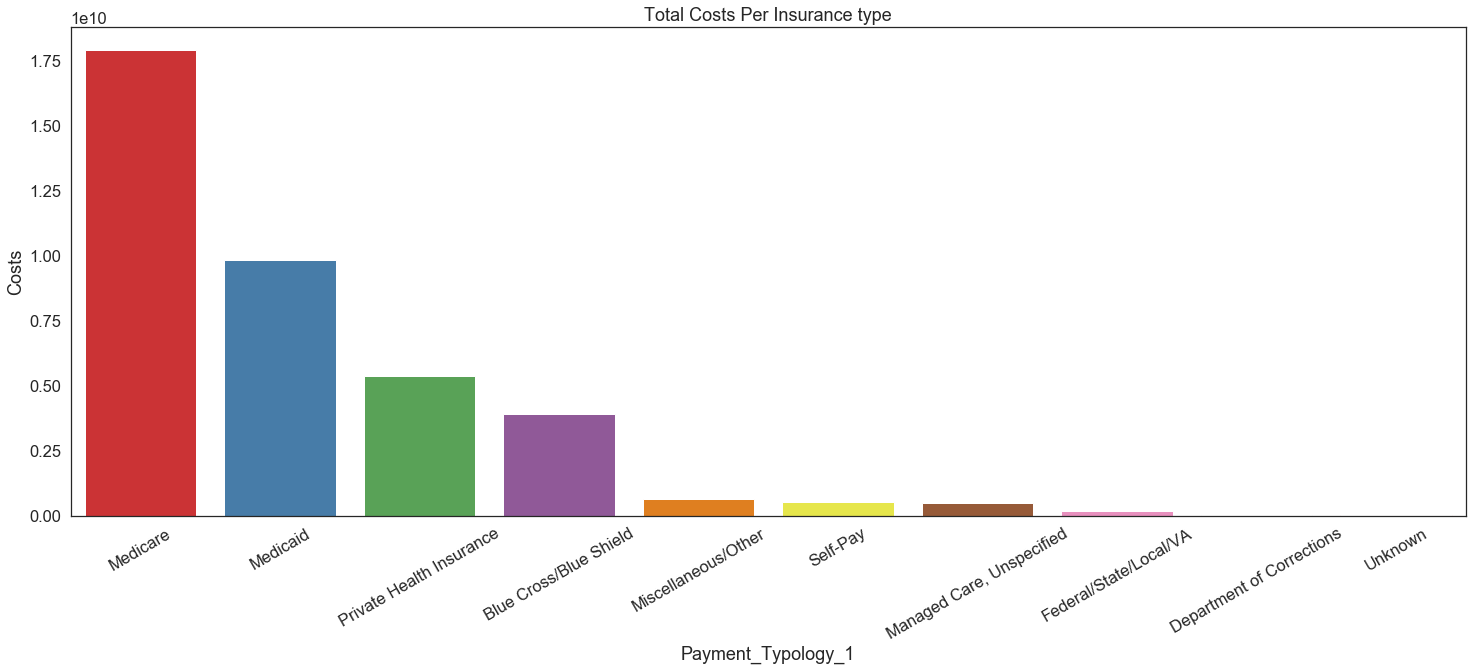

In [9]:
sns.set(font_scale=1.5)
sns.set_style("white")
f, ax = plt.subplots(figsize=(25, 9))
sns.barplot(y='Costs', x='Payment_Typology_1', data=ttl_costs_df, palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title('Total Costs Per Insurance type')
plt.show()

Medicaid beneficiaries account for the second highest total hospital costs after Medicare.

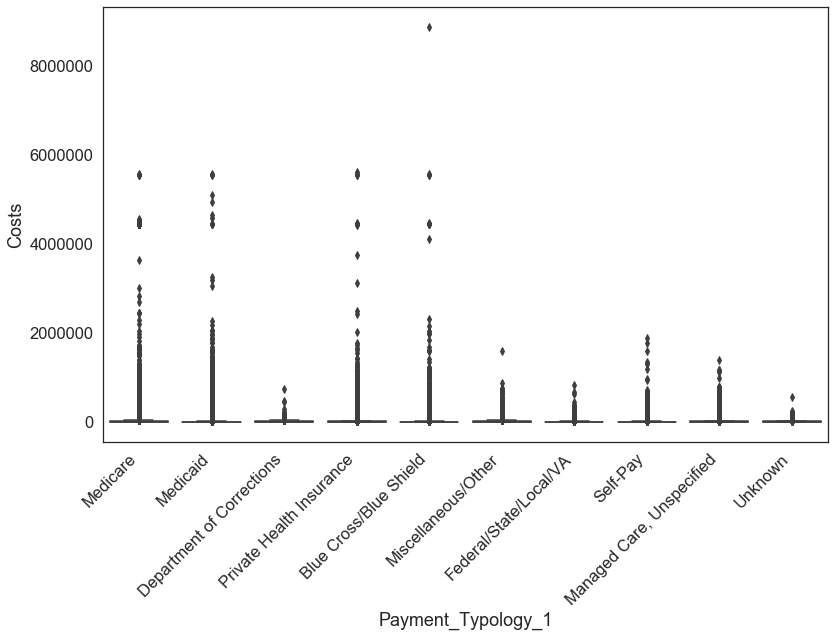

In [11]:
# what does the spread of data look like for hospital costs and payment types

plt.figure(figsize=(13,8))
plt.tight_layout()
d1=sns.boxplot(data=df, x='Payment_Typology_1', y='Costs', palette='Set1')
plt.xticks(rotation=45 )
d1.set_xticklabels(d1.get_xticklabels(), horizontalalignment='right')
plt.show()

There are extreme outliers for each payment typology, especially Mediare, Medicaid, Private Health Insurance, and BCBS. There outliers skew the data upward. 

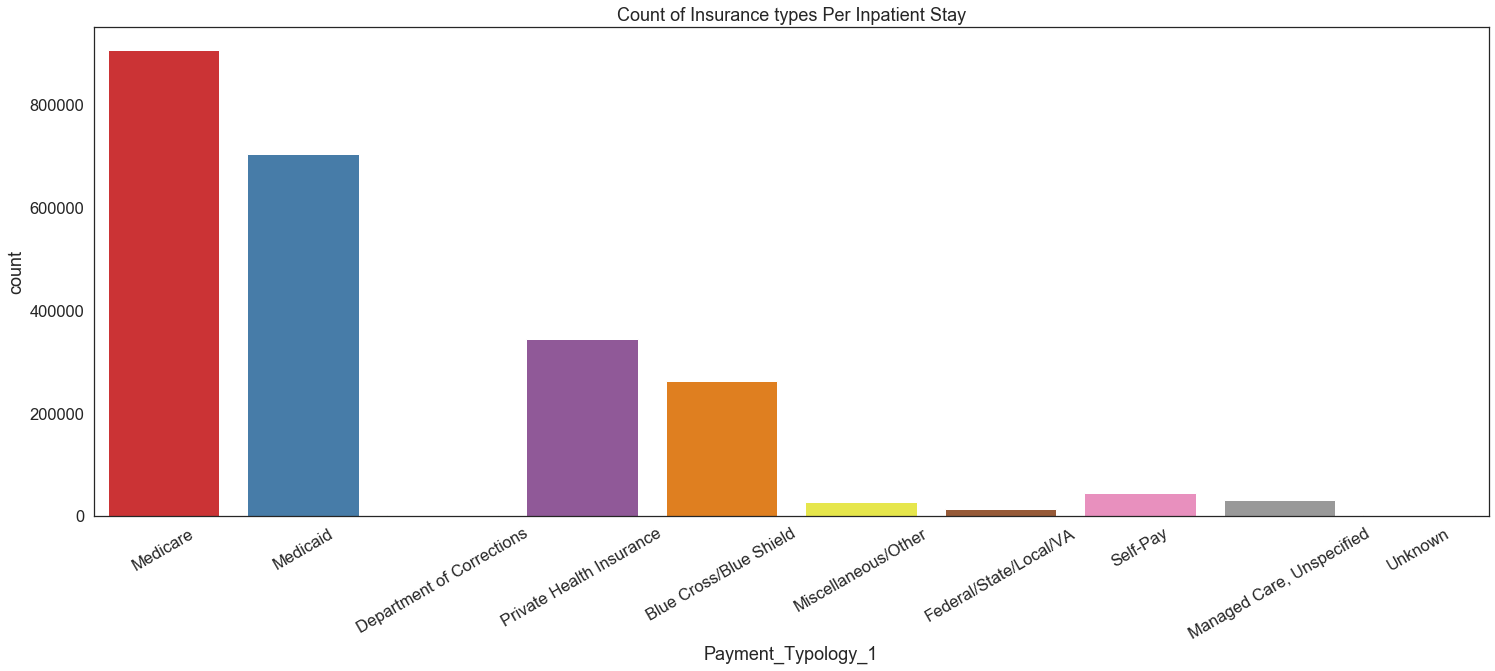

In [15]:
#How many Medicaid inpatient cases are there compared to other insurance types?

df_sort = df.sort_values(by='Costs', ascending=False)

sns.set(font_scale=1.5)
sns.set_style("white")
f, ax = plt.subplots(figsize=(25, 9))
sns.countplot(x='Payment_Typology_1', data = df, palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title('Count of Insurance types Per Inpatient Stay')
plt.show()

Medicaid members also make up the second largest share of all impatient stays from 2017. 

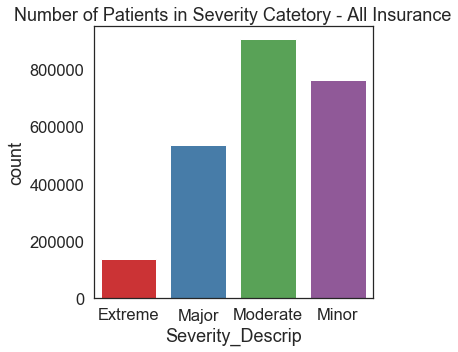

In [30]:
#Are total costs for Medicaid beneficiaries higher because they are sicker than patients with other Insurance Typologies?

#Do Medicaid patients have a higher Severity Index Description? 

f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='Severity_Descrip', data = df, order=['Extreme','Major','Moderate','Minor'], palette='Set1')
plt.title('Number of Patients in Severity Catetory - All Insurance')
plt.show()


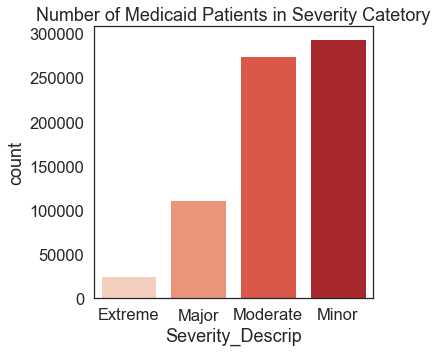

In [29]:
#What does this breakdown look like for just Medicaid patients?

f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='Severity_Descrip', data = df[df['Payment_Typology_1']=='Medicaid'], order=['Extreme','Major','Moderate','Minor'], palette='Reds')
plt.title('Number of Medicaid Patients in Severity Catetory')
plt.show()



Across all Insurance types, most patients are coded for Moderate issues, followed by minor. 

The vast majority of Medicaid patients are treated for Minor illnesses, followed by moderate.


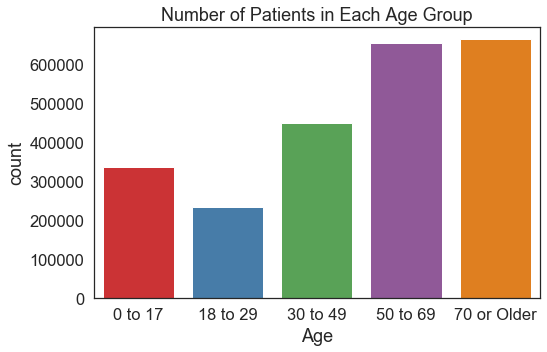

In [16]:
# Older people tend to have more health problems. What is the age range for all hospital patients?

f, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='Age', data = df, order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'], palette='Set1')
plt.title('Number of Patients in Each Age Group')
plt.show()


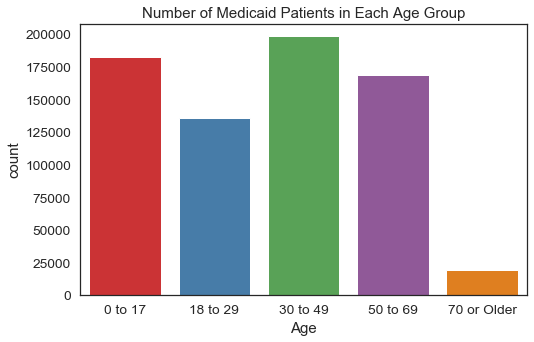

In [48]:
#What is the age range for individuals who are Medicaid members?

f, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='Age', data = df[df['Payment_Typology_1']=='Medicaid'], order=['0 to 17','18 to 29','30 to 49','50 to 69','70 or Older'], palette='Reds')
plt.title('Number of Medicaid Patients in Each Age Group')
plt.show()


Medicaid patients ages 30-49 account for the greatest number of patients, followed by youth under 17. There are few patients over 70 with the primary insurance type of Medicaid; this makes sense as individuals over 65 have Medicare as their primary insurance type. This could be why the number of patients in the 50-69 age group is lower than expected considering that older people are generally sicker. 

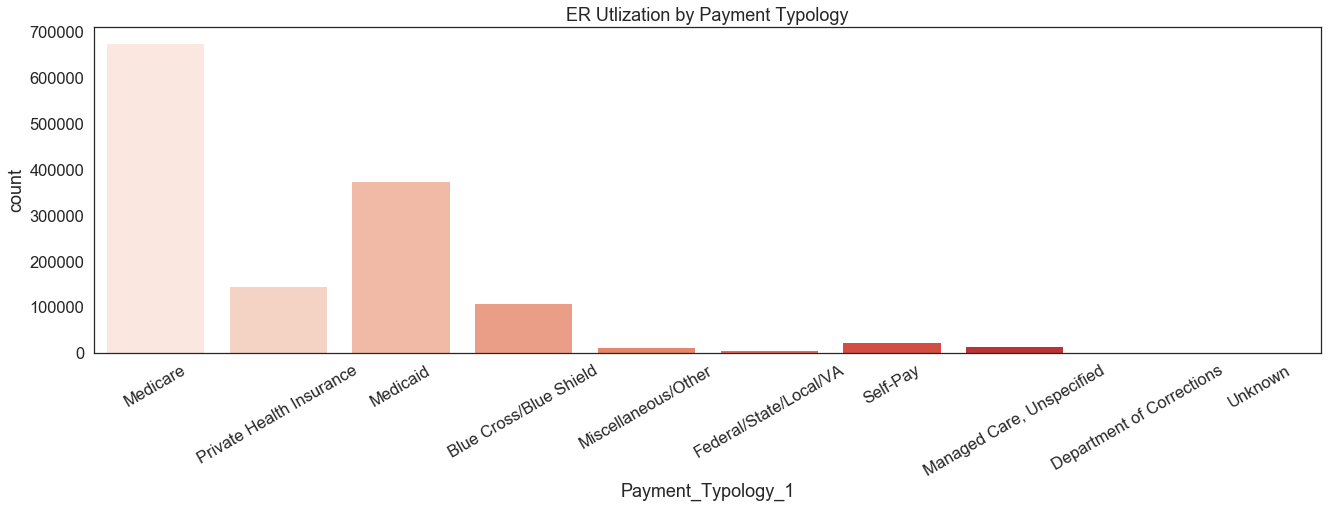

In [18]:
#Do Medicaid Patients use the ER more than other groups? 

sns.set(font_scale=1.5)
sns.set_style("white")

f, ax = plt.subplots(figsize=(22, 6))
sns.countplot(x='Payment_Typology_1', data = df[df['ER_Indicator']=='Y'], palette='Reds')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title('ER Utlization by Payment Typology')
plt.show()


Medicaid members use the ER more than any other insurance type with the exception of Medicare, which again makes sense as older people tend to be sicker.

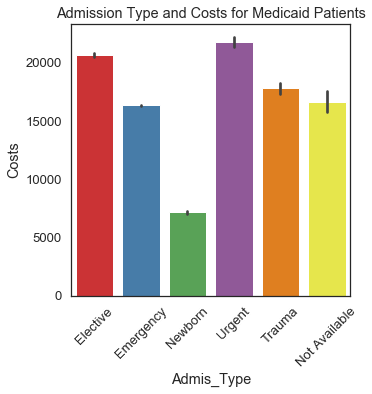

In [61]:
#Admission Types For all Patients:

sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(y="Costs", x="Admis_Type", data=df, palette='Set1')
plt.xticks(rotation=45)
plt.title('Admission Type and Costs for Medicaid Patients')
plt.show()

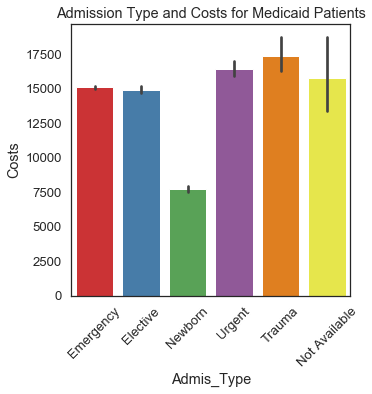

In [69]:
sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(y="Costs", x="Admis_Type", data=df_mcaid, palette='Set1')
plt.xticks(rotation=45)
plt.title('Admission Type and Costs for Medicaid Patients')
plt.show()


Medicaid patients are more likely to be admitted to the ER, Trauma unit, and Urgent Care unit than the general population.

Medicaid patients have a lower proportion of admissions for elective procedures.

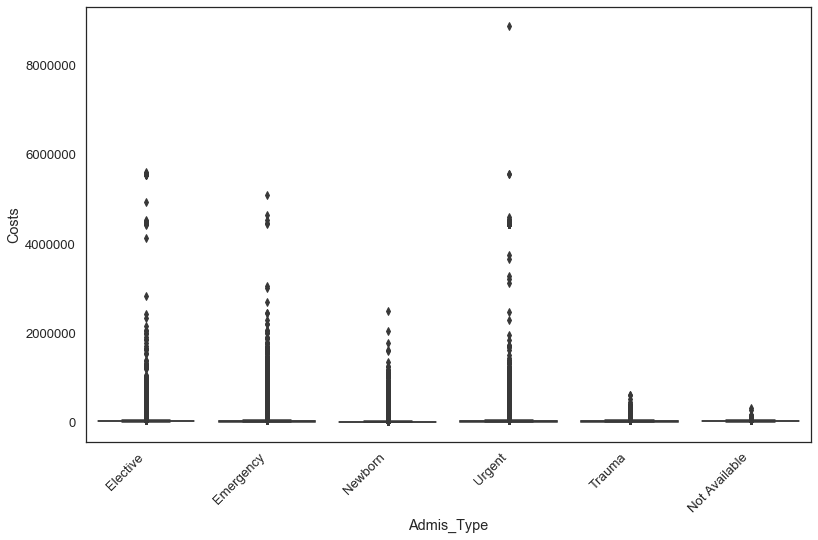

In [87]:
plt.figure(figsize=(13,8))
plt.tight_layout()
d1=sns.boxplot(data=df, x='Admis_Type', y='Costs', palette='Reds')
plt.xticks(rotation=45 )
d1.set_xticklabels(d1.get_xticklabels(), horizontalalignment='right')
plt.show()


Urgent Care, Emergency and Elective admission types have the greatest amount of variation and huge outliers.


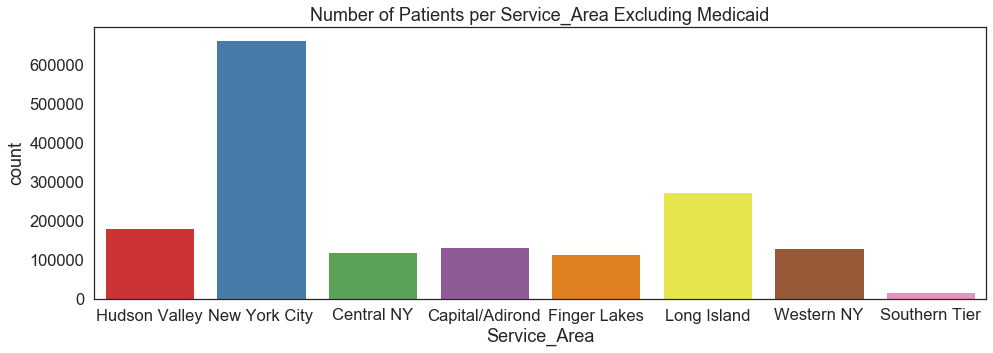

In [19]:
#What is the Impact of Location on Hospital Costs and How does this differ for Medicaid Patients?
#Are more Medicaid patients located in urban areas? 

f, ax = plt.subplots(figsize=(16, 5))
sns.countplot(x='Service_Area', data = df[df['Payment_Typology_1']!='Medicaid'], palette='Set1')
plt.title('Number of Patients per Service_Area Excluding Medicaid')
plt.show()


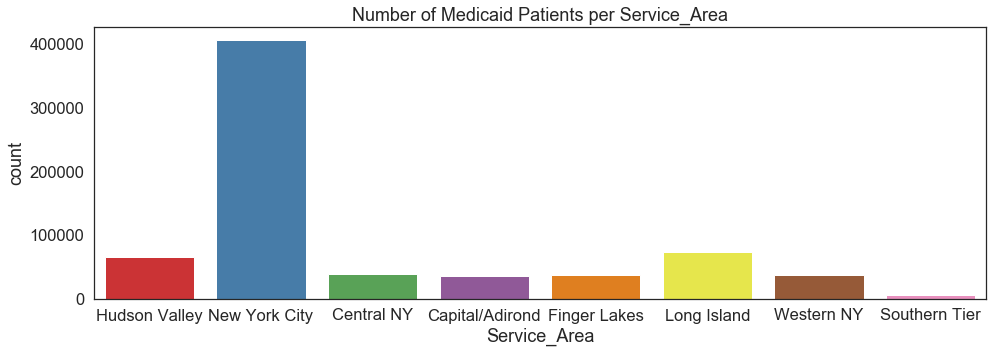

In [20]:
f, ax = plt.subplots(figsize=(16, 5))
sns.countplot(x='Service_Area', data = df[df['Payment_Typology_1']=='Medicaid'], palette='Set1')
plt.title('Number of Medicaid Patients per Service_Area')
plt.show()


If we exclude Medicaid patietns, it is clear that while NYC still accounts for the largest share of all types of patiens, 
there are fewer Medicaid beneficiares living in expensive suburban regions like Long Island and the Hudson Valley.

In [78]:
#Are average costs higher in New York City than in other regions? 

df_region = df[['Service_Area','Length_Stay', 'Costs']].groupby('Service_Area', as_index=False).mean()

display(df_region)


,Service_Area,Length_Stay,Costs
0,Capital/Adirond,5.157076,11690.666926
1,Central NY,4.879463,12161.481887
2,Finger Lakes,5.261876,12085.501718
3,Hudson Valley,5.711006,16047.686064
4,Long Island,5.239858,17381.205354
5,New York City,5.556103,19573.035138
6,Southern Tier,5.024169,10081.998045
7,Western NY,5.008220,11811.426978


New York City, Long Island, and the Hudson Valley tend to have higher costs and the same average lengths of stay.


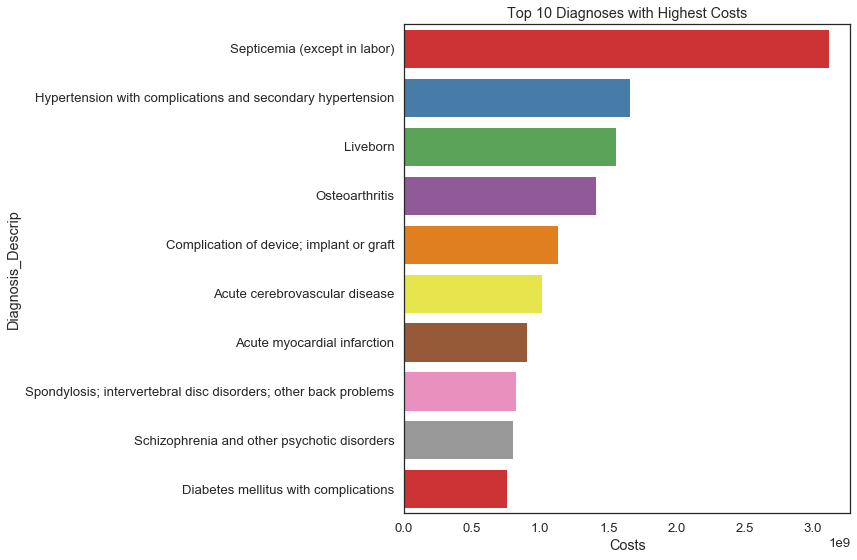

In [6]:
#Do Medicaid Patiens have different Diagnoses than the general population? 

#What Diagnosis Descriptions account for the greatest total costs for all hospital patients?

costs_df = df[['Diagnosis_Descrip','Costs','Payment_Typology_1']].groupby('Diagnosis_Descrip', as_index=False).sum()

costs_df = costs_df.sort_values(by='Costs', ascending=False, ignore_index=True)

sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))
sns.barplot(y="Diagnosis_Descrip", x="Costs", data=costs_df[0:10], palette='Set1')

plt.title('Top 10 Diagnoses with Highest Costs')
plt.show()



C:\Users\sarah\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


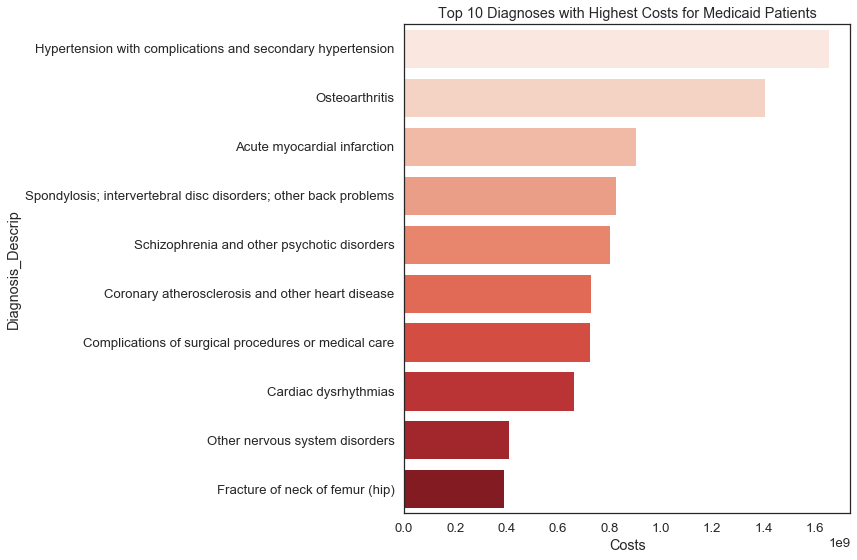

In [7]:
#What Diagnosis Descriptions have the highest total costs for Medicaid patients?

costs_medicaid = costs_df[df['Payment_Typology_1']=='Medicaid']

sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))

sns.barplot(y="Diagnosis_Descrip", x="Costs", data=costs_medicaid[0:10], palette='Reds')
plt.title('Top 10 Diagnoses with Highest Costs for Medicaid Patients')

plt.show()



Medicaid patients are much more likely to suffer from hypertension and osteoarthritis, as well as schizophrenia/psychotic disorders.

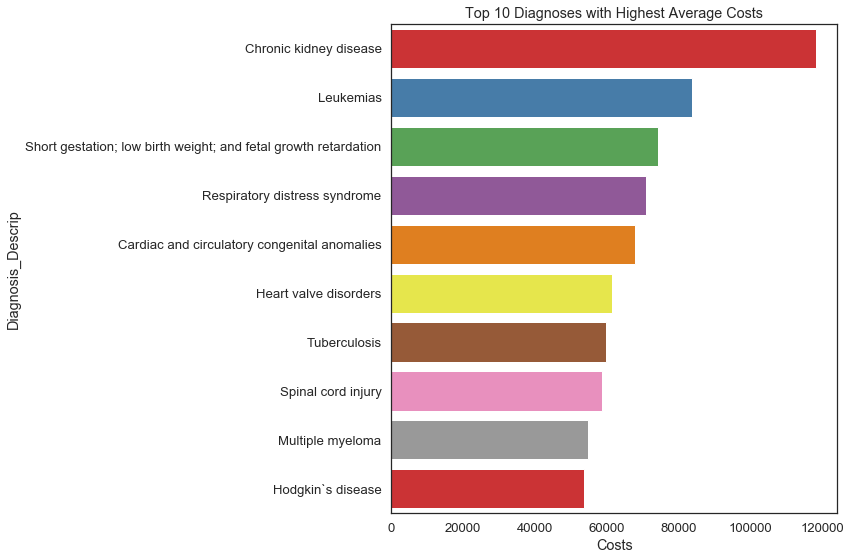

In [8]:
# What are the diagnosis descriptions that have the highest Average costs? 

avg_costs_df = df[['Diagnosis_Descrip','Costs','Payment_Typology_1']].groupby('Diagnosis_Descrip', as_index=False).mean()

avg_costs_df = avg_costs_df.sort_values(by='Costs', ascending=False, ignore_index=True)

sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))

sns.barplot(y="Diagnosis_Descrip", x="Costs", data=avg_costs_df[0:10], palette='Set1')
plt.title('Top 10 Diagnoses with Highest Average Costs')

plt.show()



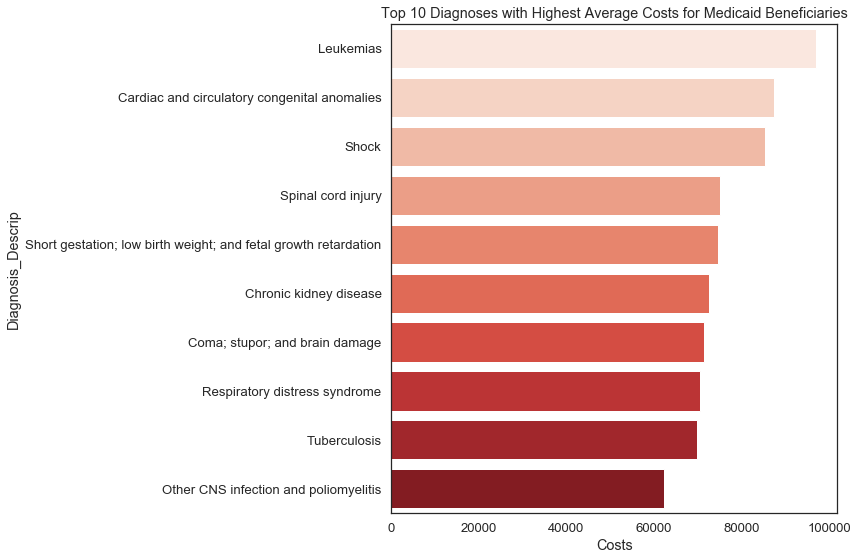

In [9]:
# What are the diagnosis descriptions that have the highest Average costs? 

df_medicaid = df[df['Payment_Typology_1']=='Medicaid']

avg_costs_medicaid = df_medicaid[['Diagnosis_Descrip','Costs','Payment_Typology_1']].groupby('Diagnosis_Descrip', as_index=False).mean()

avg_costs_medicaid = avg_costs_medicaid.sort_values(by='Costs', ascending=False, ignore_index=True)

sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))

sns.barplot(y="Diagnosis_Descrip", x="Costs", data=avg_costs_medicaid[0:10], palette='Reds')
plt.title('Top 10 Diagnoses with Highest Average Costs for Medicaid Beneficiaries')

plt.show()


Medicaid patients do not differ significantly from patients with other types of primary insurance in terms of diagnoses with the highest average costs.

In [22]:
# Which APR_MDC_Descrip are most common? 

apr_desc_df = df[['APR_MDC_Descrip','Costs']].groupby('APR_MDC_Descrip', as_index=False).count()
apr_desc_df = apr_desc_df.sort_values(by='Costs', ascending=False, ignore_index=True)
df_medicaid = df[df['Payment_Typology_1']=='Medicaid']
apr_desc_m = df_medicaid[['APR_MDC_Descrip','Costs']].groupby('APR_MDC_Descrip', as_index=False).count()
apr_desc_m = apr_desc_m.sort_values(by='Costs', ascending=False, ignore_index=True)

joined_df = apr_desc_m.merge(right=apr_desc_df, how='inner', on='APR_MDC_Descrip')

joined_df.rename(columns={'APR_MDC_Descrip': 'APR_MDC_Descrip', 'Costs_x': 'Medicaid', 'Costs_y': 'All_Patients'})

print(joined_df[0:10])

                                     APR_MDC_Descrip  Costs_x  Costs_y
0           Pregnancy, Childbirth and the Puerperium   121703   245425
1  Newborns and Other Neonates with Conditions Or...   113609   224721
2                      Mental Diseases and Disorders    54777   114924
3  Alcohol/Drug Use and Alcohol/Drug Induced Orga...    51541    76025
4   Diseases and Disorders of the Circulatory System    49756   300490
5   Diseases and Disorders of the Respiratory System    46753   191532
6     Diseases and Disorders of the Digestive System    43453   189873
7       Diseases and Disorders of the Nervous System    33124   150977
8  Diseases and Disorders of the Musculoskeletal ...    27910   211381
9  Infectious and Parasitic Diseases, Systemic or...    25537   139365


The APR descriptions related to pregnancy and newborn conditions, mental illnesses, and alcohol/drug use account for the highest costs across all Medicaid patients. Diseases and Disorders of the Circulatory System and pregnancy and newborn conditions account for the highest costs for all patients. 

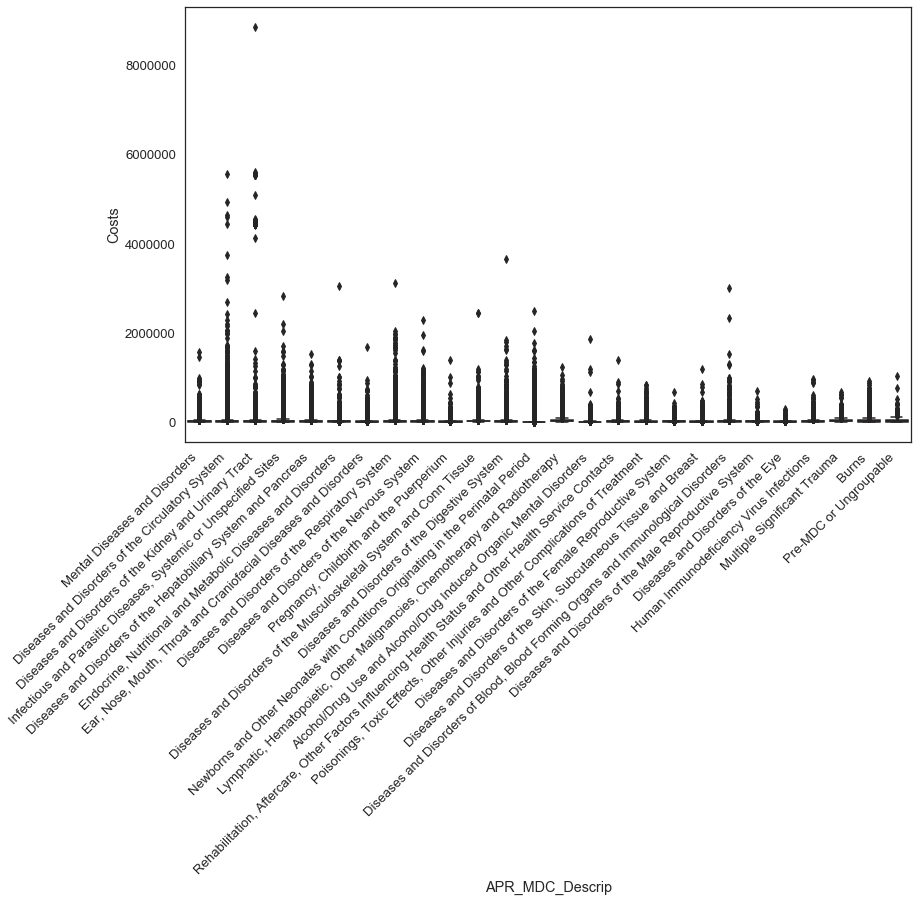

In [93]:
#What does the spread of costs look like for each APR MDC Description? 

plt.figure(figsize=(13,8))
plt.tight_layout()
d1=sns.boxplot(data=df, x='APR_MDC_Descrip', y='Costs', palette='Reds')
plt.xticks(rotation=45 )
d1.set_xticklabels(d1.get_xticklabels(), horizontalalignment='right')
plt.show()


Diseases related to the Circulatory System and Kidneys can have astronomical costs with outliers of hospital costs in the multi-millions.

In [6]:
length = df[['Length_Stay','Payment_Typology_1']].groupby('Payment_Typology_1', as_index=False).mean()

length = length.sort_values(by='Length_Stay', ascending=False, ignore_index=True)

display(length)

,Payment_Typology_1,Length_Stay
0,Department of Corrections,7.193745
1,Unknown,6.863833
2,Medicare,6.334008
3,Medicaid,5.245311
4,Miscellaneous/Other,5.115058
5,"Managed Care, Unspecified",4.643923
6,Federal/State/Local/VA,4.396629
7,Private Health Insurance,4.378202
8,Self-Pay,4.175641
9,Blue Cross/Blue Shield,4.126948


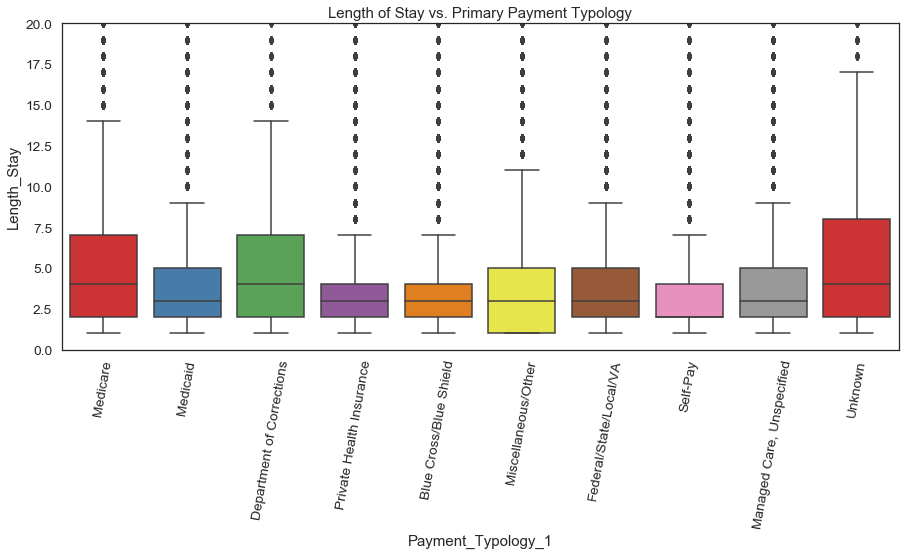

In [64]:
#How does length of stay vary across payment typologies?

sns.set(font_scale=1.25)
sns.set_style("white")
f, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="Payment_Typology_1", y="Length_Stay", data=df, palette='Set1')

ax.set(ylim=(0, 20))
plt.xticks(rotation=80)
plt.title('Length of Stay vs. Primary Payment Typology')
plt.show()


Medicare, the Department of Corrections, and Medicaid tend to have longer average lengths of stay. 

However, the mean lenght of stay does not vary significantly from Medicaid patients to those with Private or Managed Health plans.

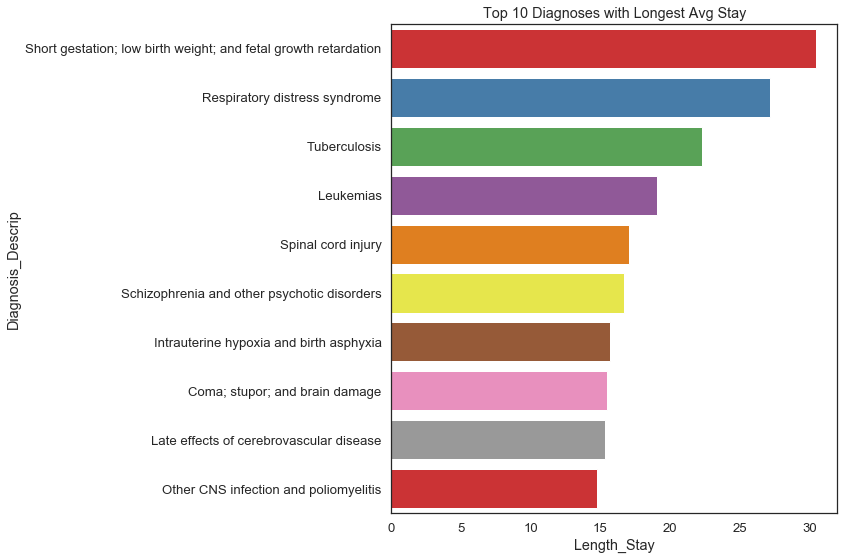

In [10]:
# What are the diagnosis descriptions that have the longest lenght of stay in the hospital? 

avg_length = df[['Diagnosis_Descrip','Length_Stay','Payment_Typology_1']].groupby('Diagnosis_Descrip', as_index=False).mean()

avg_length = avg_length.sort_values(by='Length_Stay', ascending=False, ignore_index=True)

sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))

sns.barplot(y="Diagnosis_Descrip", x="Length_Stay", data=avg_length[0:10], palette='Set1')
plt.title('Top 10 Diagnoses with Longest Avg Stay')

plt.show()


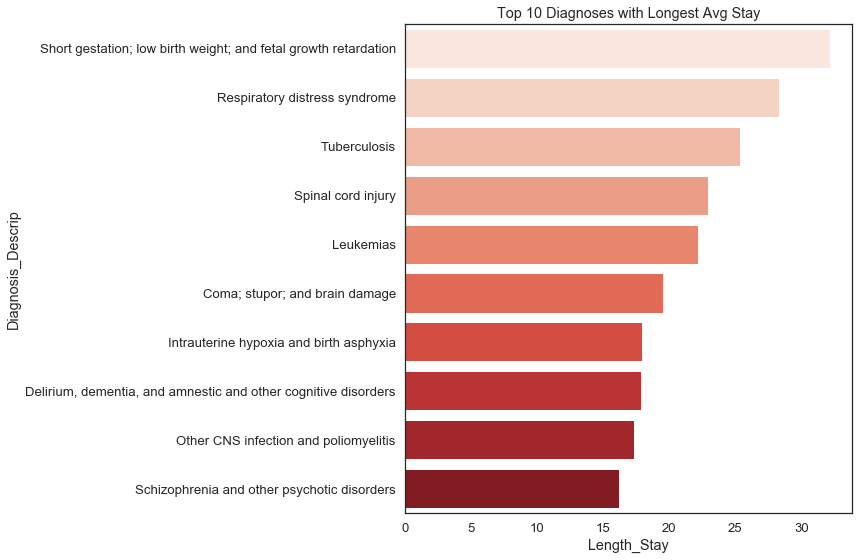

In [11]:
# What are the diagnosis descriptions for Medicaid patients that have the longest lenght of stay in the hospital? 

avg_length_m = df_medicaid[['Diagnosis_Descrip','Length_Stay']].groupby('Diagnosis_Descrip', as_index=False).mean()

avg_length_m = avg_length_m.sort_values(by='Length_Stay', ascending=False, ignore_index=True)

sns.set(font_scale=1.2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 9))

sns.barplot(y="Diagnosis_Descrip", x="Length_Stay", data=avg_length_m[0:10], palette='Reds')
plt.title('Top 10 Diagnoses with Longest Avg Stay')

plt.show()


lenght of stay does not vary dramatically for Medicaid patients for the same diagnoses 

In [23]:
#the Standard Deviation is very large for for both Costs and Lenght of Stay. 

df_num = df[['Costs','Length_Stay']]
df_num.describe()


,Costs,Length_Stay
count,2.343569e+06,2.343569e+06
mean,1.664735e+04,5.381880e+00
std,4.377389e+04,7.913272e+00
min,0.000000e+00,1.000000e+00
25%,4.784650e+03,2.000000e+00
50%,8.924510e+03,3.000000e+00
75%,1.728076e+04,6.000000e+00
max,8.868613e+06,1.200000e+02


In [100]:
variable = ['Costs','Length_Stay']

q1=[]
q3=[]
iqr=[]
for i in variable:
    Q1=round((df_2[i].quantile(0.25)), 2)
    Q3=round((df_2[i].quantile(0.75)), 2)
    IQR=Q3-Q1
    q1.append(Q1)
    q3.append(Q3)
    iqr.append(IQR)

df_2_iqr=pd.DataFrame([q1,q3,iqr], columns= variable, index=['Q1','Q3', 'IQR'])

df_2_iqr=df_2_iqr.T
df_2_iqr

,Q1,Q3,IQR
Costs,4786.27,17298.25,12511.98
Length_Stay,2.00,6.00,4.00


# Insights

Average Medicaid hospital costs at $13,992 are lower than all other types of insurance except for the Veteran's Administration and self-pay patients. STDV is $39k, which is 4th highest of all 10 insurance types. The data is very skewed upward. 

Medicaid patients account for 25 percent of all hospital costs, but 30 percent of all hospital visits. 

The vast majority of Medicaid admissions are for Minor or Moderate illnesses with Minor Mortality risk ratings

Medicaid members use the ER more than any other insurance type with the exception of Medicare, which makes sense as older people tend to be sicker. 

The most common APR MDC Descrip for Medicaid patietns are for admissions related to childbirth and neonatal conditions, mental illnesses, and alcohol related conditions. For all patients, diseases of the Circulatory system is the most common APR MDC Description, followed by childbirth and newborn/neonatal conditions.

Average length of stay is relatively consistent at approximately 6 days across insurance types with the exception of Medicare, which is slightly higher. Medicaid patients mean length of stay does not differ from private and other types of insurance excluding Medicare, but the IQR is greater than those with private insurance and BCBS.

The upper limit for the IQR for hospital costs is $17,295.21; there are significant outliers that skew the data upward. 


# Predictive Analysis

Can we infer hospital Costs by looking at Patient Typology and other variables?

In [6]:
#Convert categorical variables to numeric 

cleanup_nums = {'ER_Indicator': {'Y': 1, 'N': 0},
                'Payment_Typology_1': {'Medicare': 0,'Medicaid': 1, 'Department of Corrections': 0, 'Blue Cross/Blue Shield': 0,'Federal/State/Local/VA': 0, 'Managed Care, Unspecified': 0,'Miscellaneous/Other': 0,'Private Health Insurance': 0,'Self-Pay': 0,'Unknown': 0},
                'Severity_Descrip': {'Minor': 0,'Moderate': 1,'Major': 2,'Extreme': 3},
                'Age': {'0 to 17': 0,'18 to 29': 1,'30 to 49': 2,'50 to 69': 3,'70 or Older': 4},
                'Mortality_Risk': {'Minor': 0,'Moderate': 1,'Major': 2,'Extreme': 3}}
               
               
df.replace(cleanup_nums, inplace=True)


In [8]:
#Filter for specific variables to focus on 

df_2 = df[['Age','Length_Stay','APR_MDC_Descrip','Severity_Descrip','Mortality_Risk','Payment_Typology_1','ER_Indicator','Costs']]



In [9]:
#Make sure there are no lingering NaNs
df_2 =df_2[~df_2.isin([np.nan, np.inf, -np.inf]).any(1)]

df_2.Severity_Descrip.fillna(0, inplace=True)
df_2.Mortality_Risk.fillna(0, inplace=True)   
df_2.fillna(0, inplace=True)
df_2 = df_2.replace([np.inf, -np.inf], np.nan)

df_2.isna().sum()

Age                   0
Length_Stay           0
APR_MDC_Descrip       0
Severity_Descrip      0
Mortality_Risk        0
Payment_Typology_1    0
ER_Indicator          0
Costs                 0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

#convert APR_MDC_Descrip to category

df_2['APR_MDC_Descrip'] = df_2[['APR_MDC_Descrip']].astype('category')

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df_2['APR_MDC_Descrip_Cat'] = labelencoder.fit_transform(df_2['APR_MDC_Descrip'])

display(df_2)



,Age,Length_Stay,APR_MDC_Descrip,Severity_Descrip,Mortality_Risk,Payment_Typology_1,ER_Indicator,Costs,APR_MDC_Descrip_Cat
0,2,21,Mental Diseases and Disorders,1.0,0.0,0,0,40464.04,19
1,3,8,Diseases and Disorders of the Circulatory System,2.0,1.0,1,0,26046.50,3
2,2,6,Diseases and Disorders of the Kidney and Urina...,1.0,1.0,0,0,17397.59,8
3,3,4,"Infectious and Parasitic Diseases, Systemic or...",1.0,1.0,1,0,16118.84,17
4,1,4,"Infectious and Parasitic Diseases, Systemic or...",1.0,0.0,0,0,11921.05,17
...,...,...,...,...,...,...,...,...,...
2343564,3,2,Diseases and Disorders of the Respiratory System,0.0,1.0,0,0,16781.23,12
2343565,3,2,Diseases and Disorders of the Circulatory System,1.0,1.0,1,1,6003.38,3
2343566,2,3,Diseases and Disorders of the Musculoskeletal ...,0.0,0.0,0,1,8863.14,10
2343567,4,2,Diseases and Disorders of the Female Reproduct...,1.0,0.0,0,0,13068.87,6


In [9]:
from sklearn.preprocessing import OneHotEncoder 

# creating instance of one-hot-encoder 
enc = OneHotEncoder(handle_unknown='ignore') 
  

# passing bridge-types-cat column (label encoded values of bridge_types) 
enc_df = pd.DataFrame(enc.fit_transform(df_2[['APR_MDC_Descrip']]).toarray()) 
  
# merge with main df on key values 
df_2 = df_2.join(enc_df) 


In [10]:
display(df_2[0:5])

,Age,Length_Stay,APR_MDC_Descrip,Severity_Descrip,Mortality_Risk,Payment_Typology_1,ER_Indicator,Costs,APR_MDC_Descrip_Cat,0,...,15,16,17,18,19,20,21,22,23,24
0,2,21,Mental Diseases and Disorders,1.0,0.0,0,0,40464.04,19,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3,8,Diseases and Disorders of the Circulatory System,2.0,1.0,1,0,26046.50,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,6,Diseases and Disorders of the Kidney and Urina...,1.0,1.0,0,0,17397.59,8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,"Infectious and Parasitic Diseases, Systemic or...",1.0,1.0,1,0,16118.84,17,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,"Infectious and Parasitic Diseases, Systemic or...",1.0,0.0,0,0,11921.05,17,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Costs are very skewed so a log transformation is applied


df_2['log_costs'] = np.log(df_2['Costs'])

df_2 = df_2.drop(columns=['Costs','APR_MDC_Descrip_Cat','APR_MDC_Descrip'])


C:\Users\sarah\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


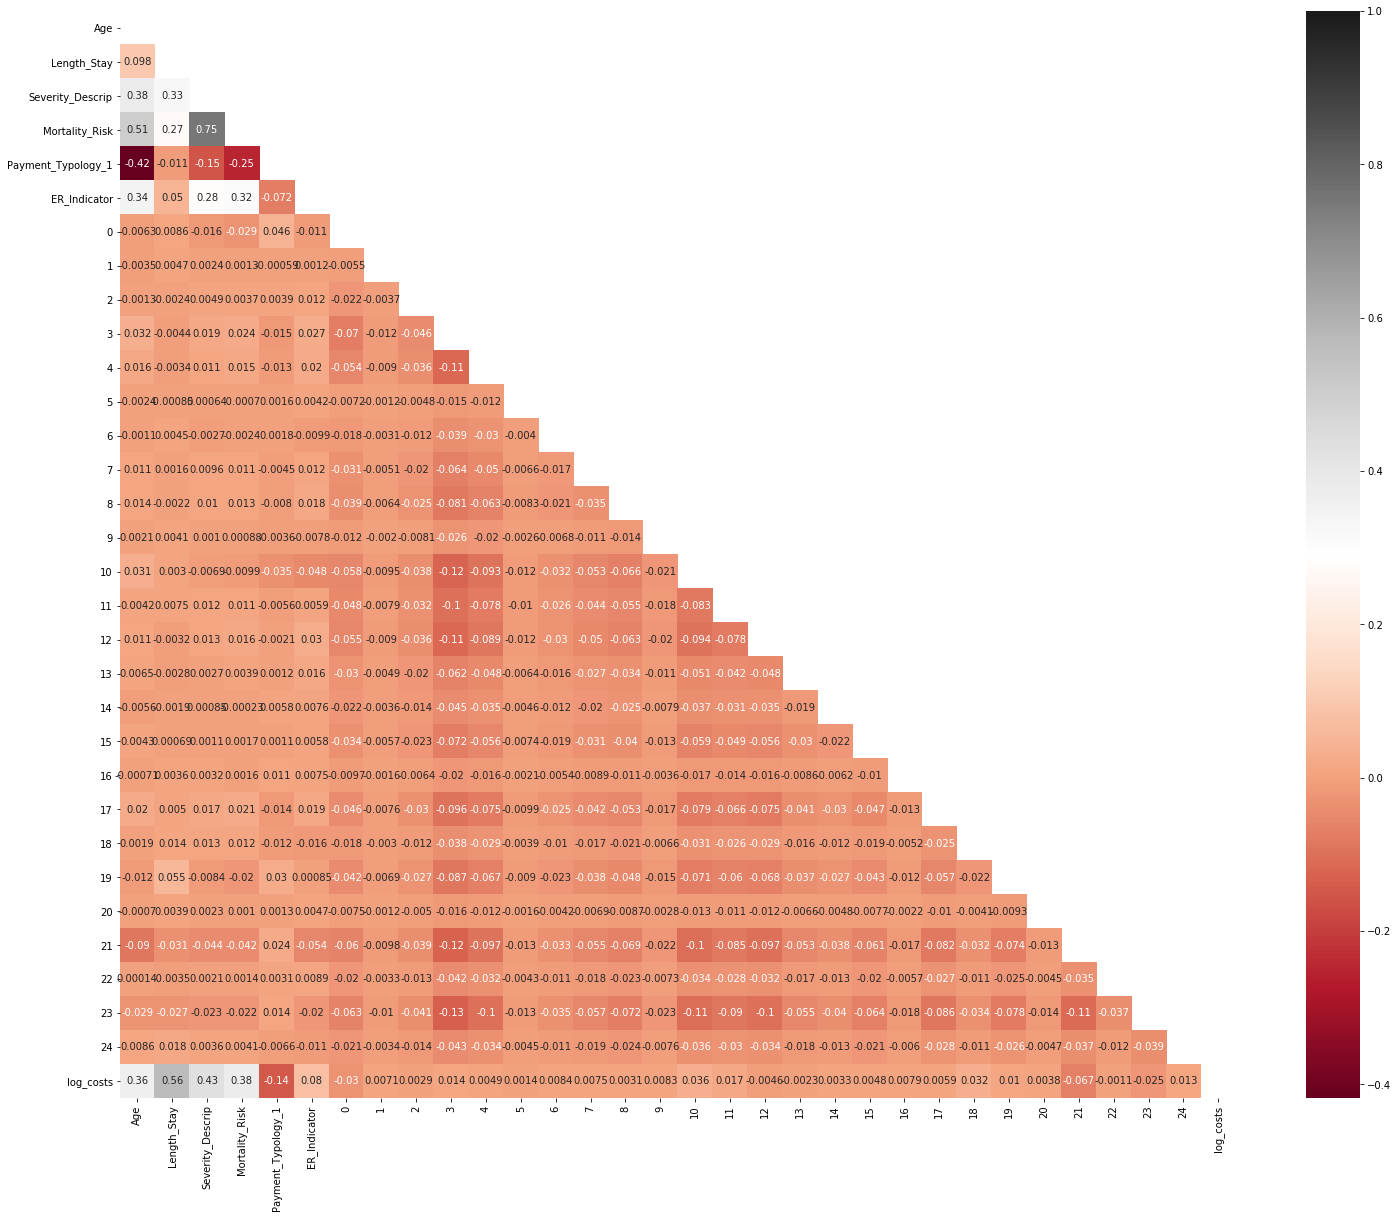

Age                   0.363936
Length_Stay           0.563967
Severity_Descrip      0.430194
Mortality_Risk        0.379007
Payment_Typology_1   -0.144739
ER_Indicator          0.080334
0                    -0.030196
1                     0.007115
2                     0.002923
3                     0.013863
4                     0.004909
5                     0.001431
6                     0.008448
7                     0.007535
8                     0.003069
9                     0.008265
10                    0.035891
11                    0.016599
12                   -0.004552
13                   -0.002271
14                    0.003325
15                    0.004772
16                    0.007873
17                    0.005936
18                    0.032387
19                    0.010174
20                    0.003820
21                   -0.067002
22                   -0.001073
23                   -0.024536
24                    0.013238
log_costs             1.000000
Name: lo

In [26]:
#Correlation with Costs

corr=df_2.corr()
f, ax = plt.subplots(figsize=(25, 20))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap="RdGy", mask=mask, annot=True)
plt.show()
print(corr['log_costs'])
 

Costs are most closely correlated with length of stay, illness severity description, and mortality risk.

# Modeling



In [19]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn import datasets, linear_model


In [20]:
df_2 =df_2[~df_2.isin([np.nan, np.inf, -np.inf]).any(1)]

x = df_2.drop(['log_costs'], axis=1).values

x = df_2[['Age','Length_Stay','Severity_Descrip','Mortality_Risk','Payment_Typology_1','ER_Indicator']].values

y = df_2[['log_costs']].values

print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape)
print(y_train.shape)

(2343323, 6)
(2343323, 1)
(1640326, 6)
(1640326, 1)


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

lin_reg_mod = LinearRegression()
lin_reg_mod = lin_reg_mod.fit(x_train, y_train)

pred = lin_reg_mod.predict(x_test)

mse = metrics.mean_squared_error(y_test, pred)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)



In [23]:
print("The mean squared error is:", mse)
print("The root mean squared error is:", test_set_rmse)
print("The R squared value is:", test_set_r2)


The mean squared error is: 0.5793071127295647
The root mean squared error is: 0.761122271865411
The R squared value is: 0.44658256886196757


In [24]:

x = sm.add_constant(x)
mreg = sm.OLS(y, x).fit()
print(mreg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 3.144e+05
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:41:00   Log-Likelihood:            -2.6896e+06
No. Observations:             2343323   AIC:                         5.379e+06
Df Residuals:                 2343316   BIC:                         5.379e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1653      0.001   5951.979      0.0